# Set up and Import the data

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime


from random import gauss
from random import seed
import random
import numpy as np
from pandas import Series
from pandas import read_csv
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm


from statsmodels.graphics.tsaplots import plot_acf

In [2]:
#!pip install --upgrade pandas statsmodels

In [3]:
# Get Historical Intuit Data since 2015

intuit_data = yf.download("INTU", start="2015-01-01")

# Add daily returnsolumn
intuit_data['Daily_Return'] = intuit_data['Close'].pct_change()

intuit_close = intuit_data["Close"]

YF.download() has changed argument auto_adjust default to True



*********************100%***********************]  1 of 1 completed

In [4]:
# Display the first few rows of data
display(intuit_data.head())

print()

# Display the first few rows of data
display(intuit_close.head())


Price,Close,High,Low,Open,Volume,Daily_Return
Ticker,INTU,INTU,INTU,INTU,INTU,
Date,,,,,,
2015-01-02,83.803780,85.595445,83.031991,84.722580,1880300,NaN
2015-01-05,83.473007,83.923217,82.453138,82.967671,2493300,-0.003947
2015-01-06,80.909554,83.794586,80.496096,83.436254,2283800,-0.030710
2015-01-07,81.701988,82.042915,80.964859,81.057000,1657600,0.009794
2015-01-08,82.798462,83.507949,82.116616,82.171899,1947100,0.013420


Ticker,INTU
Date,
2015-01-02,83.803780
2015-01-05,83.473007
2015-01-06,80.909554
2015-01-07,81.701988
2015-01-08,82.798462


In [5]:
#Summary Stats for the Daily Close Price
display(intuit_close.describe())

Ticker,INTU
count,2578.000000
mean,313.376914
std,187.353781
min,73.961502
25%,130.770473
50%,268.123703
75%,459.282341
max,705.076782


#  Time series decomposition

In [6]:
# Decomposition
decomposition = sm.tsa.seasonal_decompose(intuit_close, model='additive', period=252) # or 'multiplicative'

# Time Series Visualization

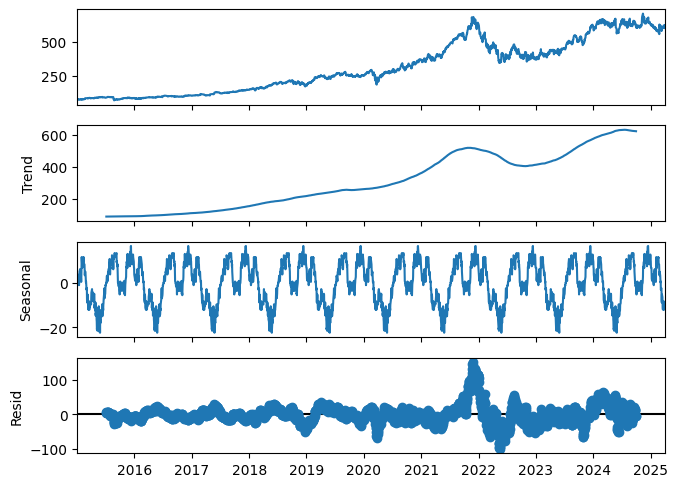

In [7]:
# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(7, 5)  # Adjust these numbers as needed (width, height)
plt.show()

This indicated non-stationary and it looks like there is seasonality

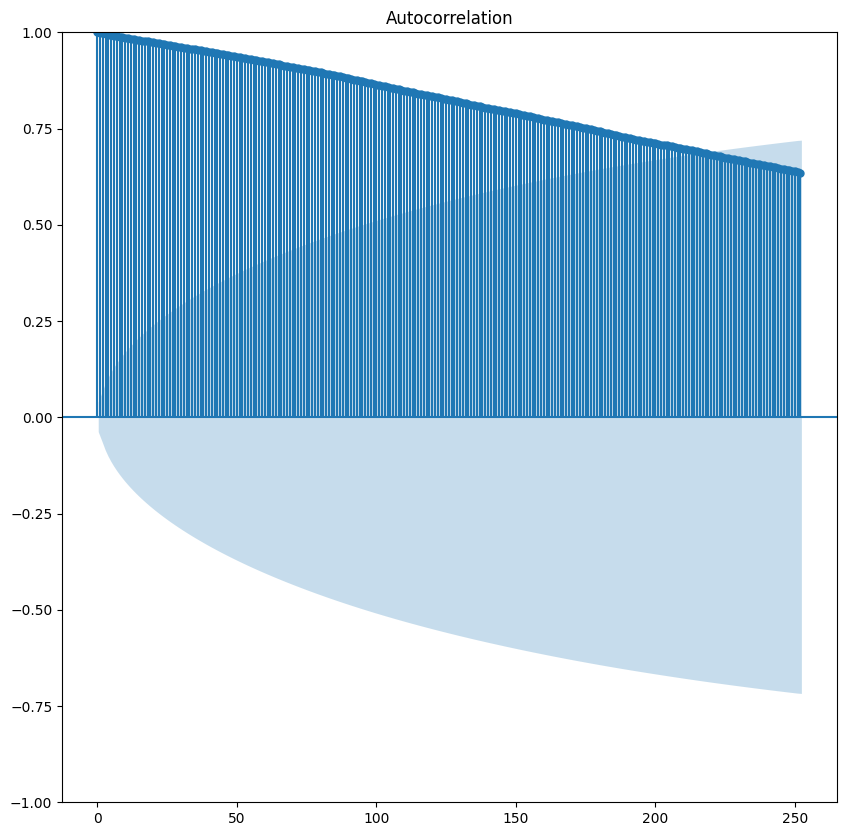

In [84]:
# Autocorrelation
plot_acf(intuit_close, lags=252)
plt.show()

Highly correclated at lag 1 and then decays over time


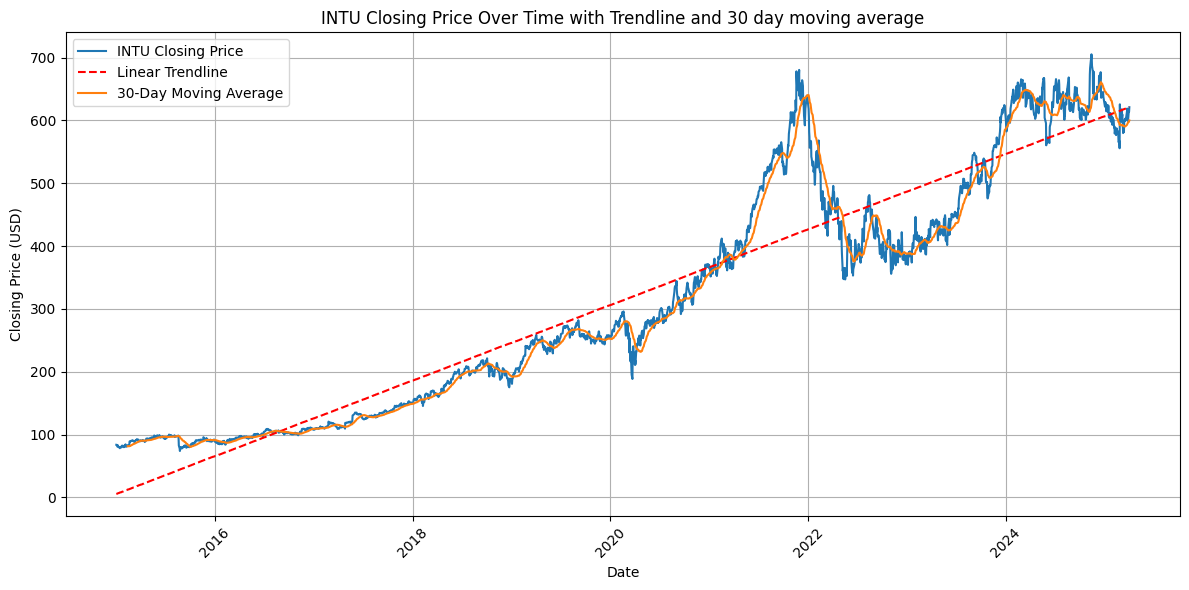

In [8]:
# Line Chart
plt.figure(figsize=(12, 6))
plt.plot(intuit_data.index, intuit_data['Close'], label='INTU Closing Price')

# Linear Trend
x = np.arange(len(intuit_data.index))
z = np.polyfit(x, intuit_data['Close'], 1)
p = np.poly1d(z.flatten())
plt.plot(intuit_data.index, p(x), "r--", label='Linear Trendline')

# Calculate 30-day moving average
intuit_data['30_day_avg'] = intuit_data['Close'].rolling(window=30).mean()['INTU']
plt.plot(intuit_data.index, intuit_data['30_day_avg'], label='30-Day Moving Average')


plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('INTU Closing Price Over Time with Trendline and 30 day moving average')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


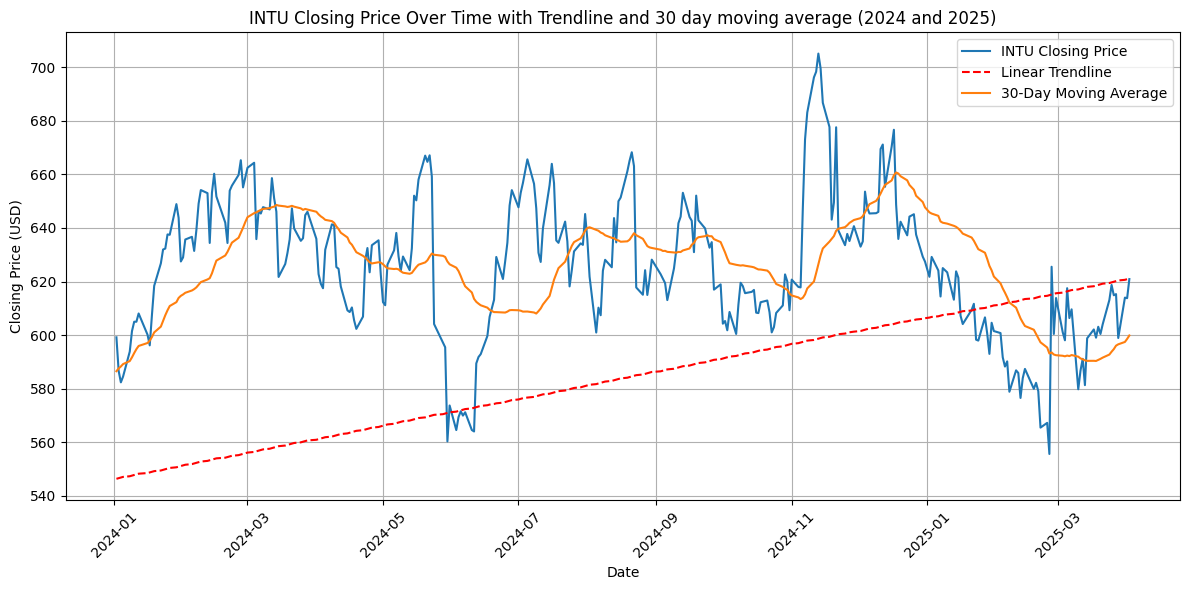

In [9]:
# Line Chart
# Same data as before but starting 2024 so we can see the last year
intuit_data_2024 = intuit_data[intuit_data.index > '2024-01-01']

plt.figure(figsize=(12, 6))
plt.plot(intuit_data_2024.index, intuit_data_2024['Close'], label='INTU Closing Price')

# Linear Trend
y_plot = p(x)[intuit_data.index > '2024-01-01']
plt.plot(intuit_data_2024.index, y_plot, "r--", label='Linear Trendline')

# Calculate 30-day moving average
plt.plot(intuit_data_2024.index, intuit_data_2024['30_day_avg'], label='30-Day Moving Average')


plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('INTU Closing Price Over Time with Trendline and 30 day moving average (2024 and 2025)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Description of Time series

As seen before the time series seems to have an overall upward trend, though this trend has become unstable starting around 2012. There is seasonality in the data, though it only accounts for a small portion of the data. The data is non-stationary since the mean as well as the variance seem to change over time.

# TS models

In [10]:
#Linear Regression model to predict next 30 days

days = np.arange(len(intuit_close)).reshape(-1, 1)  # Reshape for sklearn
prices = intuit_close.values.reshape(-1, 1)

In [11]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(days, prices)


LinearRegression()

In [12]:
# Predict the next 30 days
last_day = days[-1][0]
future_days = np.arange(last_day + 1, last_day + 31).reshape(-1, 1)
future_prices = model.predict(future_days)

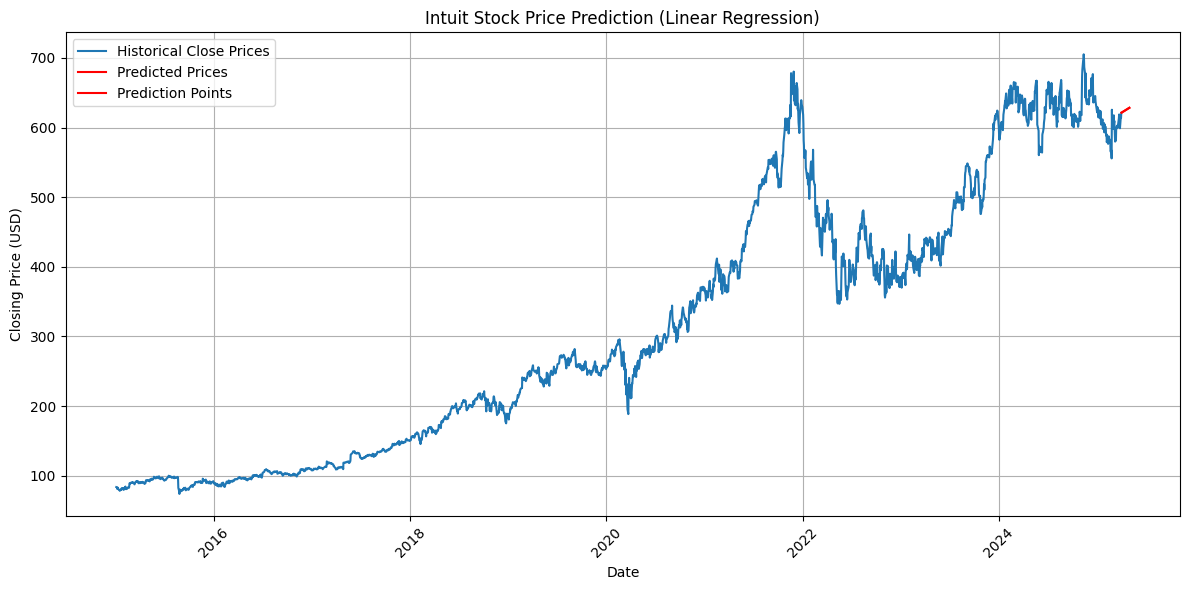

In [13]:
# Plot the historical data and predictions
plt.figure(figsize=(12, 6))
plt.plot(intuit_close.index, intuit_close, label="Historical Close Prices")


future_dates = pd.date_range(start=intuit_close.index[-1] + pd.Timedelta(days=1), periods=30)
plt.plot(future_dates, future_prices, "r-", label="Predicted Prices")
plt.plot(future_dates, future_prices, color='red', label = "Prediction Points")


plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Intuit Stock Price Prediction (Linear Regression)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Show the Next 30 Days prediction based on Linear Model
future_predictions_df = pd.DataFrame(future_prices, index=future_dates, columns=['Predicted Close'])
print(future_predictions_df)

            Predicted Close
2025-04-03       621.349602
2025-04-04       621.588433
2025-04-05       621.827264
2025-04-06       622.066095
2025-04-07       622.304926
2025-04-08       622.543758
2025-04-09       622.782589
2025-04-10       623.021420
2025-04-11       623.260251
2025-04-12       623.499082
2025-04-13       623.737913
2025-04-14       623.976744
2025-04-15       624.215575
2025-04-16       624.454406
2025-04-17       624.693237
2025-04-18       624.932068
2025-04-19       625.170899
2025-04-20       625.409731
2025-04-21       625.648562
2025-04-22       625.887393
2025-04-23       626.126224
2025-04-24       626.365055
2025-04-25       626.603886
2025-04-26       626.842717
2025-04-27       627.081548
2025-04-28       627.320379
2025-04-29       627.559210
2025-04-30       627.798041
2025-05-01       628.036873
2025-05-02       628.275704


In [15]:
# Split data into training and testing sets
days_train, days_test, prices_train, prices_test = train_test_split(days, prices, test_size=0.2, shuffle=False)

# Create and train the linear regression model
model = LinearRegression()
model.fit(days_train, prices_train)

# Make predictions on the test set
prices_pred = model.predict(days_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(prices_test, prices_pred))
mae = mean_absolute_error(prices_test, prices_pred)
r2 = r2_score(prices_test, prices_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

RMSE: 64.97600148146704
MAE: 55.57514004012013
R-squared: 0.31272476839986907
